# Colorfade plots

In [35]:
from scipy import special
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib as mpl
import matplotlib.collections as mcoll
import matplotlib.path as mpath
import matplotlib.cm as cm

import sys

Want a line plot that has a color that gradually changes in the based on distance from zero (in the vertical direction).

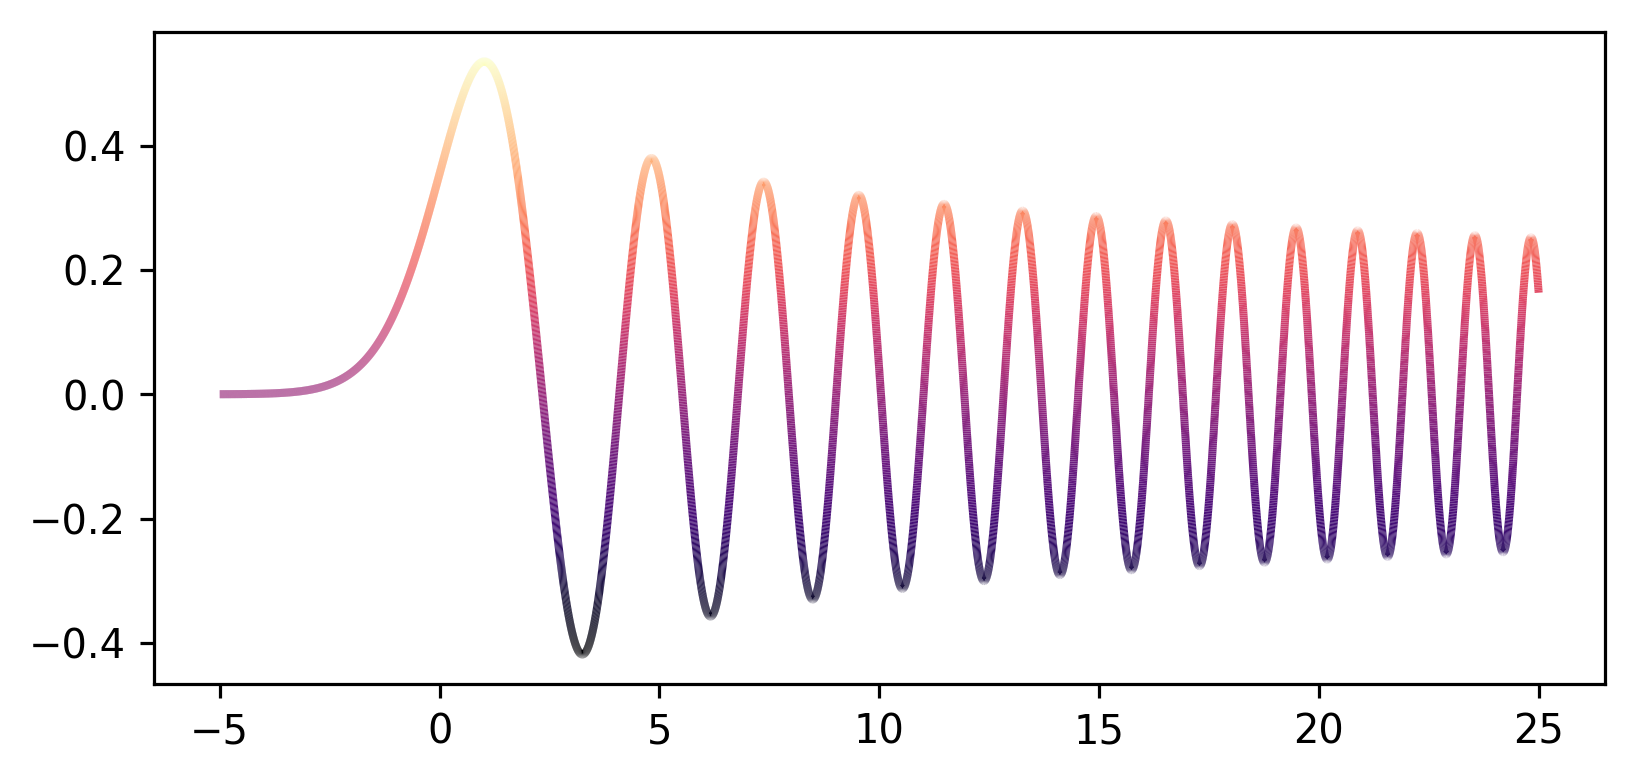

In [10]:
# basic y fade

# the data
x = np.linspace(-25, 5, 10000)
y, _, _, _ = special.airy(x) # Airy function

x = -x

fig, ax = plt.subplots(figsize = (6.5, 3), dpi = 144)

# sets up all the bounds etc
ax.plot(x, y, visible = False)

normalize = mpl.colors.Normalize(vmin=min(y), vmax=max(y))


arr_color = cm.ScalarMappable(cmap = 'magma', norm = normalize).to_rgba(y)

# sets data into list of (x,y) points
points = np.array([x, y]).T.reshape(-1, 1, 2)

# groups the points
# (x0, y0) & (x1, y1)
# (x1, y1) & (x2, y2)
# etc
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# segments into line collection, segments have different color
lc = mcoll.LineCollection(segments,
                          colors = arr_color,
                          cmap = 'plasma',
                          linewidths = 2)

ax.add_collection(lc)

plt.show()

Want a line plot that has a color that gradually changes in the based on distance from zero (in the horizontal direction).

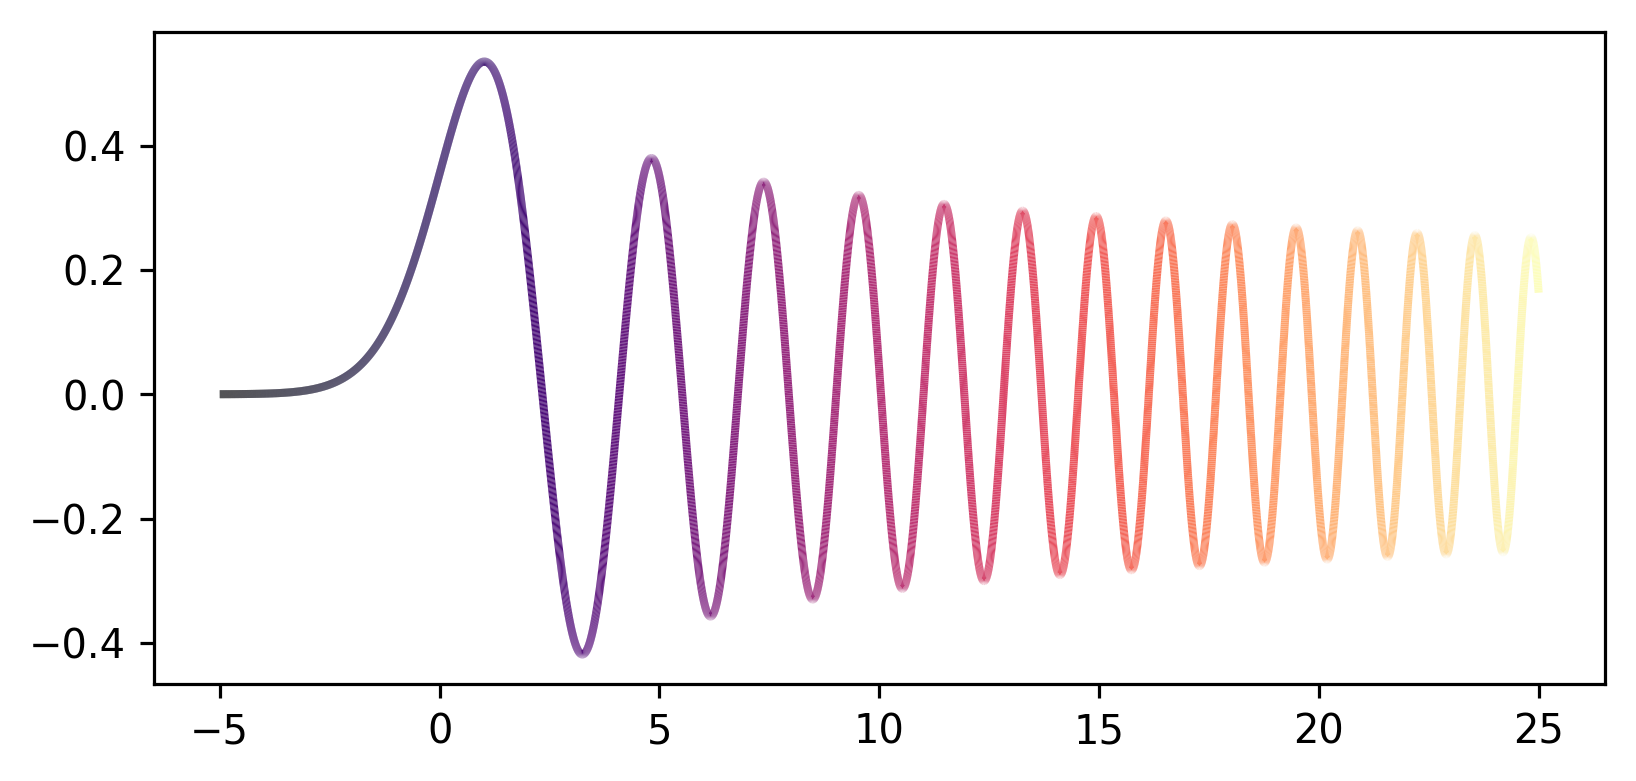

In [12]:
# basic x fade
# the data
x = np.linspace(-25, 5, 10000)
y, _, _, _ = special.airy(x) # Airy function

x = -x

fig, ax = plt.subplots(figsize = (6.5, 3), dpi = 144)

# sets up all the bounds etc
ax.plot(x, y, visible = False)

normalize = mpl.colors.Normalize(vmin=min(x), vmax=max(x))


arr_color = cm.ScalarMappable(cmap = 'magma', norm = normalize).to_rgba(x)

# sets data into list of (x,y) points
points = np.array([x, y]).T.reshape(-1, 1, 2)

# groups the points
# (x0, y0) & (x1, y1)
# (x1, y1) & (x2, y2)
# etc
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# segments into line collection, segments have different color
lc = mcoll.LineCollection(segments,
                          colors = arr_color,
                          cmap = 'plasma',
                          linewidths = 2)

ax.add_collection(lc)

plt.show()

Want a line plot that has fill between line and zero, where the fill color gradually changes from left to right.

998

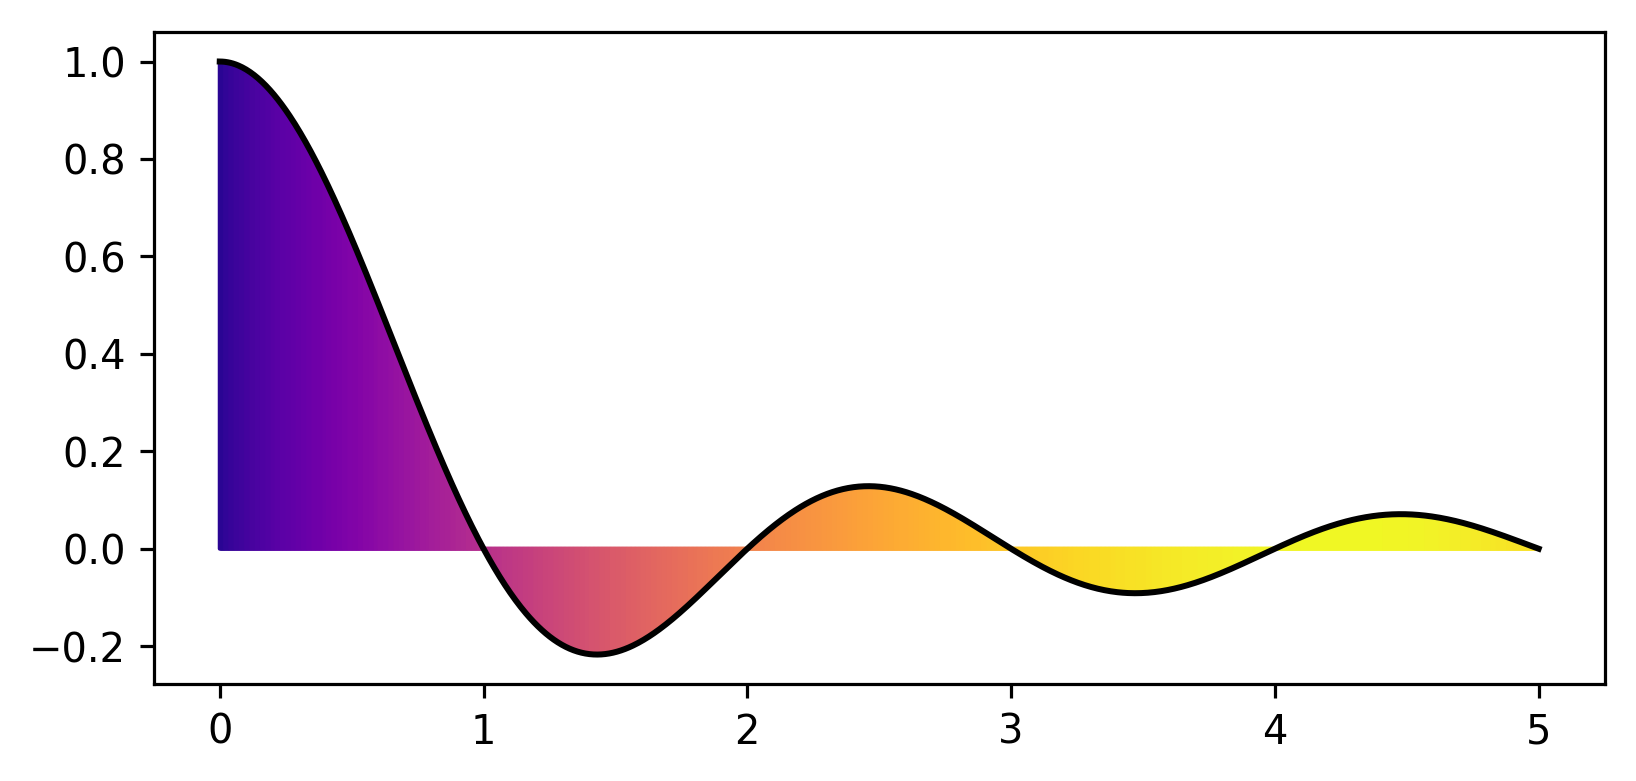

In [48]:

x = np.linspace(0, 5 , 1000)

y = np.sinc(x)

fig, ax = plt.subplots(figsize = (6.5, 3), dpi = 144)

ax.plot(x,y, color = 'black')

cmap = mpl.cm.plasma

normalize = mpl.colors.Normalize(vmin = min(x), vmax = max(x))

for j in range(len(x) - 1):
    
    ax.fill_between([x[j], x[j+1]], [y[j], y[j+1]], color= cmap(cmap(normalize(x[j]))))
    sys.stdout.write('\r'+str('%d' %j)) 
    
plt.show()

Want a line plot that has fill between the line and zero, where color gradually changes from zero to the line.

Trying something simple to start..

In [66]:
# x = np.linspace(0, 5 , 10)

# y = x

# fig, ax = plt.subplots(figsize = (6.5, 3), dpi = 144)

# ax.plot(x,y, color = 'black', marker = 's', markerfacecolor = 'r', markersize = 5 )

# cmap = mpl.cm.plasma

# normalize = mpl.colors.Normalize(vmin = min(y), vmax = max(y))

# # start at the max y value and go down making horizontal strips as we go
# for j in range(len(y) - 1)[::-1]:

#     y_short = 
#     ax.fill_between([x[j], x[j+1]], , color= cmap(cmap(normalize(y[j]))))    


# plt.show()